In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from textblob import TextBlob

In [23]:
# Load the dataset
df=pd.read_csv(r"C:\Users\nutha\Downloads\Day 20_E-Commerce_Data.csv")
df

,Order_ID,Product_Category,Product_Price,Customer_Age,Rating,Review_Text,Order_Date
0,1,Clothing,3262.0,58.0,3.0,Would not recommend,2023-01-01
1,2,Clothing,214.0,20.0,3.0,Excellent product!,2023-01-02
2,3,Home Decor,3429.0,51.0,2.0,Value for money,2023-01-03
3,4,Books,4568.0,35.0,3.0,Value for money,2023-01-04
4,5,Electronics,2237.0,32.0,4.0,Not as expected,2023-01-05
...,...,...,...,...,...,...,...
500,46,Home Decor,2965.0,41.0,4.0,Not as expected,2023-02-15
501,109,Home Decor,384.0,56.0,1.0,Excellent product!,2023-04-19
502,52,Electronics,2434.0,26.0,3.0,Value for money,2023-02-21
503,281,Home Decor,3093.0,24.0,3.0,NaN,2023-10-08


In [26]:
# Display basic info
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          505 non-null    int64  
 1   Product_Category  481 non-null    object 
 2   Product_Price     485 non-null    float64
 3   Customer_Age      490 non-null    float64
 4   Rating            480 non-null    float64
 5   Review_Text       484 non-null    object 
 6   Order_Date        495 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 27.7+ KB


None

In [28]:
# 1. Handling Missing Values
# Checking for missing values
display(df.isnull().sum())

Order_ID             0
Product_Category    24
Product_Price       20
Customer_Age        15
Rating              25
Review_Text         21
Order_Date          10
dtype: int64

In [30]:
# Impute missing numerical values
num_imputer = SimpleImputer(strategy='median')
df['Customer_Age'] = num_imputer.fit_transform(df[['Customer_Age']])
df['Rating'] = num_imputer.fit_transform(df[['Rating']])

In [32]:
# Handling missing textual data using NLP

def fill_missing_text(text):
    if pd.isnull(text):
        return "No Review"
    return text

df['Review_Text'] = df['Review_Text'].apply(fill_missing_text)

In [34]:
df.isnull().sum()

Order_ID             0
Product_Category    24
Product_Price       20
Customer_Age         0
Rating               0
Review_Text          0
Order_Date          10
dtype: int64

In [36]:
# 2. Detect and Remove Duplicates
df = df.drop_duplicates()

In [38]:
df.isnull().sum()

Order_ID             0
Product_Category    24
Product_Price       20
Customer_Age         0
Rating               0
Review_Text          0
Order_Date          10
dtype: int64

In [40]:
df

,Order_ID,Product_Category,Product_Price,Customer_Age,Rating,Review_Text,Order_Date
0,1,Clothing,3262.0,58.0,3.0,Would not recommend,2023-01-01
1,2,Clothing,214.0,20.0,3.0,Excellent product!,2023-01-02
2,3,Home Decor,3429.0,51.0,2.0,Value for money,2023-01-03
3,4,Books,4568.0,35.0,3.0,Value for money,2023-01-04
4,5,Electronics,2237.0,32.0,4.0,Not as expected,2023-01-05
...,...,...,...,...,...,...,...
495,496,Clothing,347.0,39.0,3.0,Would not recommend,2024-05-10
496,497,Electronics,4478.0,22.0,3.0,Would not recommend,2024-05-11
497,498,NaN,2179.0,24.0,3.0,Fast delivery,2024-05-12
498,499,Books,3841.0,37.0,4.0,Excellent product!,2024-05-13


In [42]:
# 3. Handle Inconsistent Data
# Standardize Rating values
df = df[(df['Rating'] >= 1) & (df['Rating'] <= 5)]
print("Ratings standardized.")

Ratings standardized.


In [44]:
df

,Order_ID,Product_Category,Product_Price,Customer_Age,Rating,Review_Text,Order_Date
0,1,Clothing,3262.0,58.0,3.0,Would not recommend,2023-01-01
1,2,Clothing,214.0,20.0,3.0,Excellent product!,2023-01-02
2,3,Home Decor,3429.0,51.0,2.0,Value for money,2023-01-03
3,4,Books,4568.0,35.0,3.0,Value for money,2023-01-04
4,5,Electronics,2237.0,32.0,4.0,Not as expected,2023-01-05
...,...,...,...,...,...,...,...
495,496,Clothing,347.0,39.0,3.0,Would not recommend,2024-05-10
496,497,Electronics,4478.0,22.0,3.0,Would not recommend,2024-05-11
497,498,NaN,2179.0,24.0,3.0,Fast delivery,2024-05-12
498,499,Books,3841.0,37.0,4.0,Excellent product!,2024-05-13


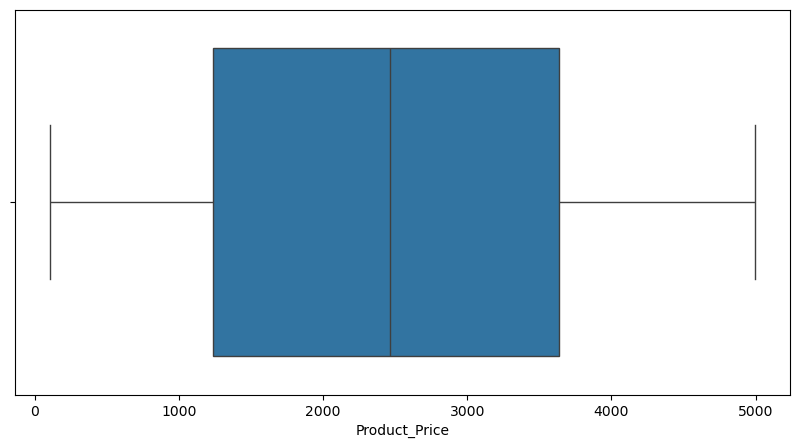

In [46]:
# 4. Identify and Handle Outliers
# Boxplot to detect anomalies
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Product_Price'])
plt.show()

In [48]:
# Handling outliers using IQR
Q1 = df['Product_Price'].quantile(0.25)
Q3 = df['Product_Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_removed = df[(df['Product_Price'] < lower_bound) | (df['Product_Price'] > upper_bound)].shape[0]
df = df[(df['Product_Price'] >= lower_bound) & (df['Product_Price'] <= upper_bound)]
print(f"Number of outliers removed: {outliers_removed}")

Number of outliers removed: 0


In [50]:
# 5. Convert Categorical Data to Numerical Format
df = pd.get_dummies(df, columns=['Product_Category'], drop_first=True)
print("Categorical data converted to numerical format.")

Categorical data converted to numerical format.


In [52]:
df['Product_Category_Books']

0      False
1      False
2      False
3       True
4      False
       ...  
495    False
496    False
497    False
498     True
499    False
Name: Product_Category_Books, Length: 480, dtype: bool

In [54]:
# Save the cleaned dataset
df.to_csv("cleaned_ecommerce_reviews.csv", index=False)
print("Data cleaning and preparation complete. Cleaned dataset saved as 'cleaned_ecommerce_reviews.csv'")

Data cleaning and preparation complete. Cleaned dataset saved as 'cleaned_ecommerce_reviews.csv'


In [56]:
df1=pd.read_csv('cleaned_ecommerce_reviews.csv')
df1

,Order_ID,Product_Price,Customer_Age,Rating,Review_Text,Order_Date,Product_Category_Books,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Home Decor
0,1,3262.0,58.0,3.0,Would not recommend,2023-01-01,False,True,False,False
1,2,214.0,20.0,3.0,Excellent product!,2023-01-02,False,True,False,False
2,3,3429.0,51.0,2.0,Value for money,2023-01-03,False,False,False,True
3,4,4568.0,35.0,3.0,Value for money,2023-01-04,True,False,False,False
4,5,2237.0,32.0,4.0,Not as expected,2023-01-05,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
475,496,347.0,39.0,3.0,Would not recommend,2024-05-10,False,True,False,False
476,497,4478.0,22.0,3.0,Would not recommend,2024-05-11,False,False,True,False
477,498,2179.0,24.0,3.0,Fast delivery,2024-05-12,False,False,False,False
478,499,3841.0,37.0,4.0,Excellent product!,2024-05-13,True,False,False,False
